## DATA606 Capstone Project- PART IV: Execution and Interpretation

## Credit Risk Analysis and Prediction of Loan Defaults
The dataset existed in the open source kaggle.com website through the link: https://www.kaggle.com/wendykan/lending-club-loan-data 
- Lending Club Loan Dataset contain complete loan data for all loans issued through the year 2007 to 2015 
- Dataset Size: 2 GB
- Actual number of records: 887 thousand 
- Actual number of columns: 74


## Table of Content
- Summary
- Import Libraries
- Load and study the data
- Data Cleaning 
  - Correlation matrix and analysis
  - Handle missing values and Data types
  - Imputation 
- Exploratory Data Analysis
  - Univariate Analysis
  - Bivariate Analysis
    - Missing Values
    - Formatting Numerical Data
    - Creating dummy variables for Categorical
- Data Transformation
 - One-hot encoding
 - Scaling numerical data
- Model
  - SMOTE for class imbalance
  - Naive Bayes
  - Logistic Regression
  - Random Forest


## Import Libraries

In [200]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib
from pandas import Series, DataFrame
pd.set_option('display.max_rows', None,'display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
import pandas.plotting
matplotlib.use('Agg')
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from scipy import stats
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score 
import warnings
import itertools
import xgboost as xgb


warnings.filterwarnings('ignore')

import gc
gc.collect()
import psutil ; print(list(psutil.virtual_memory())[0:2])
print(list(psutil.virtual_memory())[0:2])


[34199511040, 11054198784]
[34199511040, 11054198784]


## Load and study the data

In [83]:
df = pd.read_csv(r'C:\Users\mhaile\Desktop\files\UMBC\DATA606\loan.csv', low_memory=False)

In [84]:
# Have a look at to top 5 of the dataset
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# dimension of the data
df.shape

(887379, 74)

In [86]:
# List of columns 
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

## Data Cleaning and Feature selection

In [87]:
# get percentage of missing values
df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

dti_joint                      99.942640
verification_status_joint      99.942415
annual_inc_joint               99.942415
il_util                        97.902024
mths_since_rcnt_il             97.654892
all_util                       97.591559
max_bal_bc                     97.591559
open_rv_24m                    97.591559
open_rv_12m                    97.591559
total_cu_tl                    97.591559
total_bal_il                   97.591559
open_il_24m                    97.591559
open_il_12m                    97.591559
open_il_6m                     97.591559
open_acc_6m                    97.591559
inq_fi                         97.591559
inq_last_12m                   97.591559
desc                           85.797726
mths_since_last_record         84.555303
mths_since_last_major_derog    75.015974
mths_since_last_delinq         51.197065
next_pymnt_d                   28.507661
total_rev_hi_lim                7.919502
tot_cur_bal                     7.919502
tot_coll_amt    

In [88]:
# a function calculates percentage of NaN values in DataFrame
def get_percentage_missing(series):
    numb = series.isnull().sum()
    den = len(series)
    return round(numb/den, 2)

**Drop columns with missig value >=50%**

In [89]:
for name, values in df.iteritems():
    if get_percentage_missing(df[name]) >= 0.50:
        df.drop(name, axis=1, inplace=True)

In [90]:
print(len(df.columns))

53


In [91]:
# List of columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

Lending club provides more features for each loan after they are funded, however they provide a much small number of features to potential investors. Since we are developing a tool for investors, all features not provided to investors should be eliminated except those that reference the loan outcome: 'loan_status' 

In [92]:
df = df.drop(['id', 'member_id', 'policy_code', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'application_type',
      'tot_coll_amt','tot_cur_bal', 'total_rev_hi_lim', 'pymnt_plan'], axis = 1)

In [93]:
# The remaining columns
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_rec_prncp',
       'collections_12_mths_ex_med', 'acc_now_delinq'],
      dtype='object')

### Correlation matrix analysis

In [94]:
corr = df.corr()

In [95]:
corr = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))
corr = corr[abs(corr) >= 0.6].stack().reset_index()
corr.head(20)

,level_0,level_1,0
0,loan_amnt,funded_amnt,0.999263
1,loan_amnt,funded_amnt_inv,0.997115
2,loan_amnt,installment,0.944977
3,funded_amnt,funded_amnt_inv,0.998025
4,funded_amnt,installment,0.946005
5,funded_amnt_inv,installment,0.943632


 Drop additional columns which are redundant based on the above correleation matrix 

- loan_amnt and funded_amnt are highly correlated with 99.9% so that this shows they are redunadant and we will drop funded_amnt
- loan_amnt and funded_amount_inv are highly correlated with 99.7% and this shows that they are redundant and we will drop funded_amount_inv.
- loan_amnt and installment are highly correlated with 94.5% and this shows that they are redundant and we will drop installment.
- And also installment is highly correlated with funded_amnt and funded_amnt_inv with 94.6% and 94.4% respectively and we already decided to drop funded_amnt and funded_amnt_inv.


In [96]:
# Drop redundant columns identified by using the analysis of correlation matrix
df = df.drop([ 'funded_amnt', 'funded_amnt_inv', 'installment'], axis = 1)

Drop additional columns which don't provide addional useful information
- url; provides no additonal useful info
- zip_code; we will not have zip code level data

In [97]:
df = df.drop([ 'url', 'zip_code'], axis = 1)

In [98]:
len(df.columns)

26

In [99]:
# The remaining columns
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_rec_prncp',
       'collections_12_mths_ex_med', 'acc_now_delinq'],
      dtype='object')

 ### Handle missing values and Data types

In [100]:
# counting the number of remaining missing values
null_counts = df.isnull().sum()

# displaying results 
null_counts[null_counts != 0]

emp_title                     51462
emp_length                    44825
annual_inc                        4
title                           152
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_util                      502
collections_12_mths_ex_med      145
acc_now_delinq                   29
dtype: int64

In [101]:
df.dtypes

loan_amnt                     float64
term                           object
int_rate                      float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_rec_prncp               float64
collections_12_mths_ex_med    float64
acc_now_delinq                float64
dtype: objec

### Imputation of catagorical and numerical features

In [102]:
# Impute atagorical variables impute with mode
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
df['earliest_cr_line'] = df['earliest_cr_line'].fillna(df['earliest_cr_line'].mode()[0])


In [103]:
# Continuous variales impute with median
df['annual_inc'].fillna(value=df['annual_inc'].median(), inplace = True)
df['open_acc'].fillna(value=df['open_acc'].median(), inplace = True)
df['pub_rec'].fillna(value=df['pub_rec'].median(), inplace = True)
df['delinq_2yrs'].fillna(value=df['delinq_2yrs'].median(), inplace = True)
df['inq_last_6mths'].fillna(value=df['inq_last_6mths'].median(), inplace = True)
df['revol_util'].fillna(value=df['revol_util'].median(), inplace = True)
df['collections_12_mths_ex_med'].fillna(value=df['collections_12_mths_ex_med'].median(), inplace = True)
df['acc_now_delinq'].fillna(value=df['acc_now_delinq'].median(), inplace = True)


### Select Catagorical Variables

- We need to deal with non-numeric values in order to encode and use them in our model

In [104]:
print(df.dtypes.value_counts())

object     13
float64    13
dtype: int64


- We have 13 data type object that need to be addressed, let's explore them

In [105]:
object_columns_df = df.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

term                     36 months
grade                            B
sub_grade                       B2
emp_title                      NaN
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
issue_d                   Dec-2011
loan_status             Fully Paid
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
Name: 0, dtype: object


Let's count the number of occurences of each column unique values.

In [106]:
# a function to get unique values in each column
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("\n==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [107]:
uniq_per_col(object_columns_df,20)


====  term has 2 unique entries ====
 36 months    621125
 60 months    266254
Name: term, dtype: int64

====  grade has 7 unique entries ====
B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

====  sub_grade has 35 unique entries ====
B3    56323
B4    55626
C1    53387
C2    52236
C3    50161
C4    48857
B5    48833
B2    48781
B1    44972
A5    44816
C5    41219
D1    36238
A4    34531
D2    29803
D3    26554
D4    25558
A3    23457
A1    22913
A2    22485
D5    21389
Name: sub_grade, dtype: int64

====  emp_title has 299271 unique entries ====
Teacher             13469
Manager             11240
Registered Nurse     5525
Owner                5376
RN                   5355
Supervisor           4983
Sales                4212
Project Manager      3988
Driver               3569
Office Manager       3510
General Manager      3178
Director             3156
manager              3138
teacher              2925
owner               

- term has 2 unique entries, either 36 months or 60 months.
- grade has 7 unique entries.
- sub_grade has 35 unique entries.
- emp_title has 299271 unique entries
- title is the loan title provided by the borrower.
- emp_length has 11 unique entries, it is the employment length in years with possible values between 0 and years."
- home_ownership has 6 unique entries .
- verification_status has 3 unique entries, indicates if income was verified by, not verified, or if the income source was verified". 
- issue_d has 103 unique entries
- loan_status has 10 unique entries
- purpose has 14 unique entries , it is "a category provided by the borrower for the loan request".
- addr_state has 51 unique entries,: "The state provided by the borrower in the loan application"
- grade and sub_grade are recurring data that we already have with the int_rate feature, thus we can exclude one of them.
- title title has 63144 unique entries : "The loan title provided by the borrower"
  

There are too many unique titles for emp_title feature to be useful, so we drop this it.

In [108]:
df = df.drop(['emp_title'], axis=1)

purpose and title: The two columns seem to have similar information. We will keep the purpose column as the title column is probably added by the customer and can vary. The purpose is streamlined in comparison with the title containing a lot of the same just under a different form (debt consolidation written in different ways)
- There are 14 unique purposes in the dataset, and from the top 10 titles, it seems that this information is covered in the "purpose". So we drop title column.

In [109]:
df = df.drop(['title'], axis=1)

*Define our selected catagorical features for the model*

In [110]:
categorical_features=['term', 'sub_grade', 'home_ownership', 'verification_status', 'addr_state', 'purpose']


### Select Numerical Variables

In [111]:
numeri_columns_df = df.select_dtypes(include=["float64"])
print(numeri_columns_df.iloc[0])


loan_amnt                      5000.00
int_rate                         10.65
annual_inc                    24000.00
dti                              27.65
delinq_2yrs                       0.00
inq_last_6mths                    1.00
open_acc                          3.00
pub_rec                           0.00
revol_bal                     13648.00
revol_util                       83.70
total_rec_prncp                5000.00
collections_12_mths_ex_med        0.00
acc_now_delinq                    0.00
Name: 0, dtype: float64


*Define our selected numerical features for the model*

In [112]:
numerical_features=['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs'
                    ,'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal','revol_util'
                    , 'total_rec_prncp', 'collections_12_mths_ex_med',
                     'acc_now_delinq', 'emp_length']


In [113]:
# re-check percentage of missing values if any
df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values()

loan_amnt                     0.0
total_rec_prncp               0.0
revol_util                    0.0
revol_bal                     0.0
pub_rec                       0.0
open_acc                      0.0
inq_last_6mths                0.0
earliest_cr_line              0.0
delinq_2yrs                   0.0
dti                           0.0
addr_state                    0.0
purpose                       0.0
loan_status                   0.0
issue_d                       0.0
verification_status           0.0
annual_inc                    0.0
home_ownership                0.0
emp_length                    0.0
sub_grade                     0.0
grade                         0.0
int_rate                      0.0
term                          0.0
collections_12_mths_ex_med    0.0
acc_now_delinq                0.0
dtype: float64

* The above result shows that all missing values have been handeled.

### Cleaning features and target variable "loan_status"
- Since our objective is to predict the probability of being default and impact of default, let us understand "loan_status" column more thoroughly.

In [114]:
df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

- Filter our dataset based on the target variable "loan_status" 

In [115]:
# Filter rows based on the following values of loan_status field
df = df[(df['loan_status'] == 'Fully Paid')|
        (df['loan_status'] == 'Charged Off')|
        (df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid')|
        (df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off')|
        (df['loan_status'] == 'Default')|
        (df['loan_status'] == 'Late (31-120 days)')|
        (df['loan_status'] == 'Late (16-30 days)')
         ]


- In order to increase the predictive power of our model, the target variable "loan_status" classified for any loan that were defaulted, were charged off, or were late on payments as "Default", while we classified any loan that was fully paid was classified as "Fully Paid".Because it is the risk of default as a result of borrowers failing to make required payments leading to loose of principal and interest.   

In [116]:
df['loan_status'] = df[['loan_status']].replace( 'Does not meet the credit policy. Status:Fully Paid','Fully Paid')
df['loan_status'] = df[['loan_status']].replace('Does not meet the credit policy. Status:Charged Off','Default')
df['loan_status'] = df[['loan_status']].replace('Charged Off','Default')
df['loan_status'] = df[['loan_status']].replace('Late (31-120 days)','Default')
df['loan_status'] = df[['loan_status']].replace('Late (16-30 days)','Default')

In [117]:
# unique values of "loan_status"
df['loan_status'].value_counts()

Fully Paid    209711
Default        61176
Name: loan_status, dtype: int64

In [118]:
# cleaning "emp_length" field
df['emp_length'] = df.emp_length.str.replace('+','')
df['emp_length'] = df.emp_length.str.replace('<','')
df['emp_length'] = df.emp_length.str.replace('years','')
df['emp_length'] = df.emp_length.str.replace('year','')
df['emp_length'] = df.emp_length.str.replace(' ','')
df['emp_length'] = df.emp_length.str.replace(' ','')
df['emp_length'] = df.emp_length.fillna(value=0)

In [119]:
#Change emp_length to numerical variable
df['emp_length'] = df['emp_length'].astype('int64')

In [120]:
df.emp_length.unique()

array([10,  1,  3,  9,  4,  5,  6,  2,  7,  8], dtype=int64)

In [121]:
# Check if the categorical data has missing values
df[categorical_features].isnull().sum()

term                   0
sub_grade              0
home_ownership         0
verification_status    0
addr_state             0
purpose                0
dtype: int64

In [122]:
#Create DataFrame for the Categorical data
data_categorical=pd.DataFrame()
for col in categorical_features:
    data_categorical=pd.concat([ data_categorical, df[col]], axis= 1)

data_categorical.head()

,term,sub_grade,home_ownership,verification_status,addr_state,purpose
0,36 months,B2,RENT,Verified,AZ,credit_card
1,60 months,C4,RENT,Source Verified,GA,car
2,36 months,C5,RENT,Not Verified,IL,small_business
3,36 months,C1,RENT,Source Verified,CA,other
5,36 months,A4,RENT,Source Verified,AZ,wedding


In [123]:
#Create dataframe for the Numerical Data
data_numerical=pd.DataFrame()
for col in numerical_features:
    data_numerical=pd.concat([ data_numerical, df[col]], axis= 1)

data_numerical.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_rec_prncp,collections_12_mths_ex_med,acc_now_delinq,emp_length
0,5000.0,10.65,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,5000.00,0.0,0.0,10
1,2500.0,15.27,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,456.46,0.0,0.0,1
2,2400.0,15.96,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,2400.00,0.0,0.0,10
3,10000.0,13.49,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,10000.00,0.0,0.0,10
5,5000.0,7.90,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,5000.00,0.0,0.0,3


In [124]:
# double-check missing values for numerical features
data_numerical.isna().sum()

loan_amnt                     0
int_rate                      0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_rec_prncp               0
collections_12_mths_ex_med    0
acc_now_delinq                0
emp_length                    0
dtype: int64

In [125]:
data_numerical.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_rec_prncp,collections_12_mths_ex_med,acc_now_delinq,emp_length
count,270887.000000,270887.000000,2.708870e+05,270887.000000,270887.000000,270887.000000,270887.000000,270887.000000,2.708870e+05,270887.000000,270887.000000,270887.000000,270887.000000,270887.000000
mean,13628.407971,13.891907,7.239949e+04,16.698684,0.258525,0.885753,10.975990,0.147187,1.530901e+04,54.525460,11032.161935,0.007328,0.003396,6.064215
std,8164.469951,4.413615,5.834734e+04,7.861082,0.759783,1.154699,4.928385,0.444536,1.975312e+04,24.757062,8330.958819,0.093150,0.063284,3.518715
min,500.000000,5.320000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7375.000000,10.990000,4.500000e+04,10.850000,0.000000,0.000000,7.000000,0.000000,5.843000e+03,36.550000,4567.825000,0.000000,0.000000,3.000000
50%,12000.000000,13.670000,6.200000e+04,16.360000,0.000000,1.000000,10.000000,0.000000,1.091800e+04,56.000000,9600.000000,0.000000,0.000000,6.000000
75%,18500.000000,16.780000,8.700000e+04,22.190000,0.000000,1.000000,14.000000,0.000000,1.908700e+04,74.000000,15350.000000,0.000000,0.000000,10.000000
max,35000.000000,28.990000,8.706582e+06,57.140000,29.000000,33.000000,76.000000,15.000000,1.746716e+06,892.300000,35000.030000,6.000000,5.000000,10.000000


In [126]:
data_categorical.isna().sum()

term                   0
sub_grade              0
home_ownership         0
verification_status    0
addr_state             0
purpose                0
dtype: int64

In [127]:
for col in data_categorical.columns:
    print(col,'\n'*2,data_categorical[col].unique(),'\n'*3)

term 

 [' 36 months' ' 60 months'] 



sub_grade 

 ['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3'] 



home_ownership 

 ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY'] 



verification_status 

 ['Verified' 'Source Verified' 'Not Verified'] 



addr_state 

 ['AZ' 'GA' 'IL' 'CA' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA' 'MN' 'NJ'
 'OR' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'NV' 'AK' 'CO' 'MD'
 'WV' 'VT' 'MI' 'DC' 'SD' 'NC' 'AR' 'NM' 'KS' 'HI' 'OK' 'MT' 'WY' 'NH'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME' 'ND'] 



purpose 

 ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational'] 





## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [128]:
df.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_rec_prncp,collections_12_mths_ex_med,acc_now_delinq
count,270887.000000,270887.000000,270887.000000,2.708870e+05,270887.000000,270887.000000,270887.000000,270887.000000,270887.000000,2.708870e+05,270887.000000,270887.000000,270887.000000,270887.000000
mean,13628.407971,13.891907,6.064215,7.239949e+04,16.698684,0.258525,0.885753,10.975990,0.147187,1.530901e+04,54.525460,11032.161935,0.007328,0.003396
std,8164.469951,4.413615,3.518715,5.834734e+04,7.861082,0.759783,1.154699,4.928385,0.444536,1.975312e+04,24.757062,8330.958819,0.093150,0.063284
min,500.000000,5.320000,1.000000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7375.000000,10.990000,3.000000,4.500000e+04,10.850000,0.000000,0.000000,7.000000,0.000000,5.843000e+03,36.550000,4567.825000,0.000000,0.000000
50%,12000.000000,13.670000,6.000000,6.200000e+04,16.360000,0.000000,1.000000,10.000000,0.000000,1.091800e+04,56.000000,9600.000000,0.000000,0.000000
75%,18500.000000,16.780000,10.000000,8.700000e+04,22.190000,0.000000,1.000000,14.000000,0.000000,1.908700e+04,74.000000,15350.000000,0.000000,0.000000
max,35000.000000,28.990000,10.000000,8.706582e+06,57.140000,29.000000,33.000000,76.000000,15.000000,1.746716e+06,892.300000,35000.030000,6.000000,5.000000


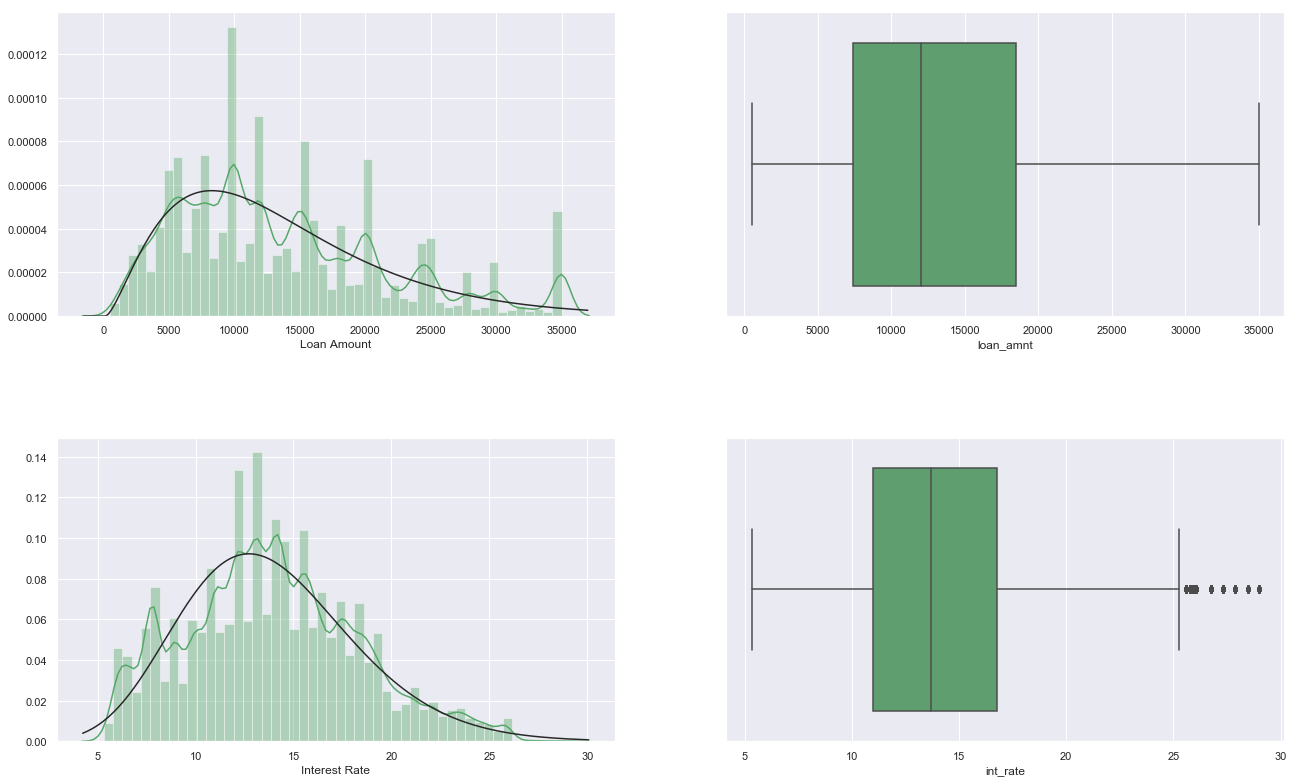

In [129]:

fig, ax =plt.subplots(2,2, figsize=(22,15))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

# Loan amount distribution plots
sns.distplot(df.loan_amnt, fit=stats.gamma, axlabel="Loan Amount", label="Loan Amount Frequency distribution", ax=ax[0][0], color="g")
sns.boxplot(x=df.loan_amnt, ax=ax[0][1],  color="g")

# Interest rates distribution plots
sns.distplot(df.int_rate, fit=stats.gamma, axlabel="Interest Rate", label="Interest Frequency distribution", ax=ax[1][0],  color="g")
sns.boxplot(x=df.int_rate, ax=ax[1][1],  color="g")

fig.show()


### Bivariate Analysis

<Figure size 936x504 with 0 Axes>

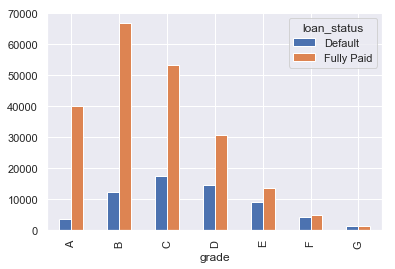

In [130]:
plt.figure(figsize = (13,7))
df.groupby(['grade', 'loan_status']).size().unstack().plot(kind='bar', stacked=False)

- This bar plot shows that grade have predicting power over who will be defaulted. The ratio of default increases with higher grade

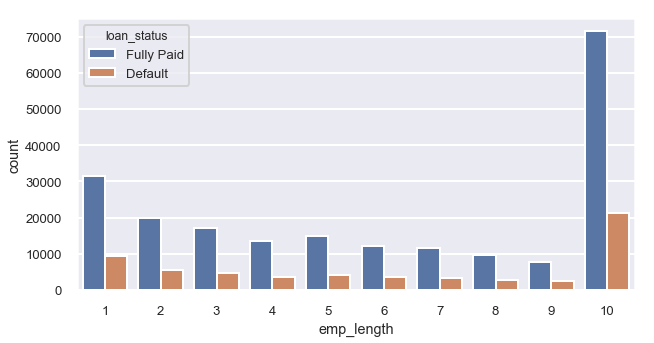

In [131]:
plt.figure(figsize = (10,5))
sns.set_context("poster", font_scale=0.6)
sns.countplot(x='emp_length', hue='loan_status', data=df)

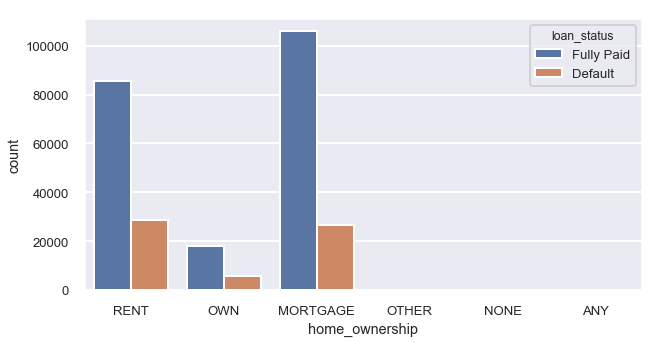

In [132]:
plt.figure(figsize = (10,5))
sns.set_context("poster", font_scale=0.6)
sns.countplot(x='home_ownership', hue='loan_status', data=df,)

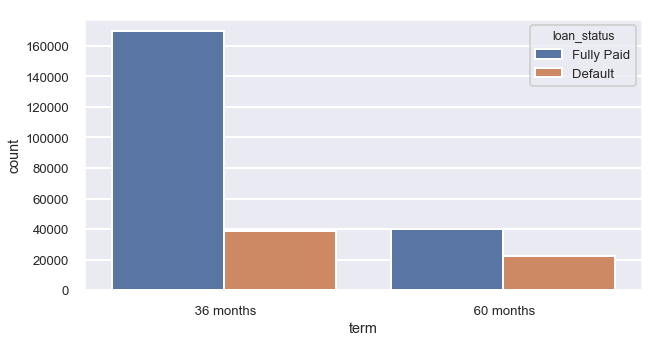

In [133]:
plt.figure(figsize = (10,5))
sns.set_context("poster", font_scale=0.6)
sns.countplot(x='term', hue='loan_status', data=df,)

- In general, the loan_status shows proportional increase with employment length

- The ratio of default is higher for loan term 60 months than 36 months, this shows that term has strong correlation with loan_status

<Figure size 720x360 with 0 Axes>

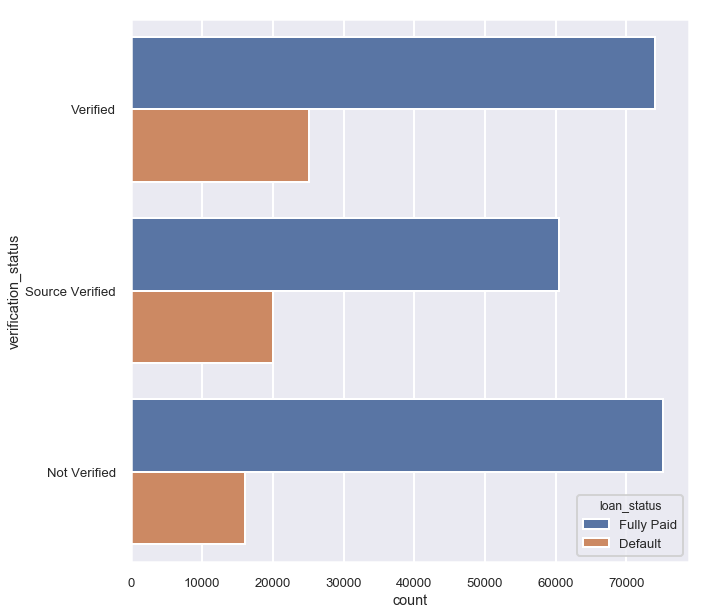

In [134]:
plt.figure(figsize = (10,5))
sns.set_context("poster", font_scale=0.6)                                                  
plt.figure(figsize=(10, 10))                                                                                                                                                                                                                                 
plt.ylabel('Loan Originating State')
sns.countplot(y='verification_status', hue='loan_status', data=df)

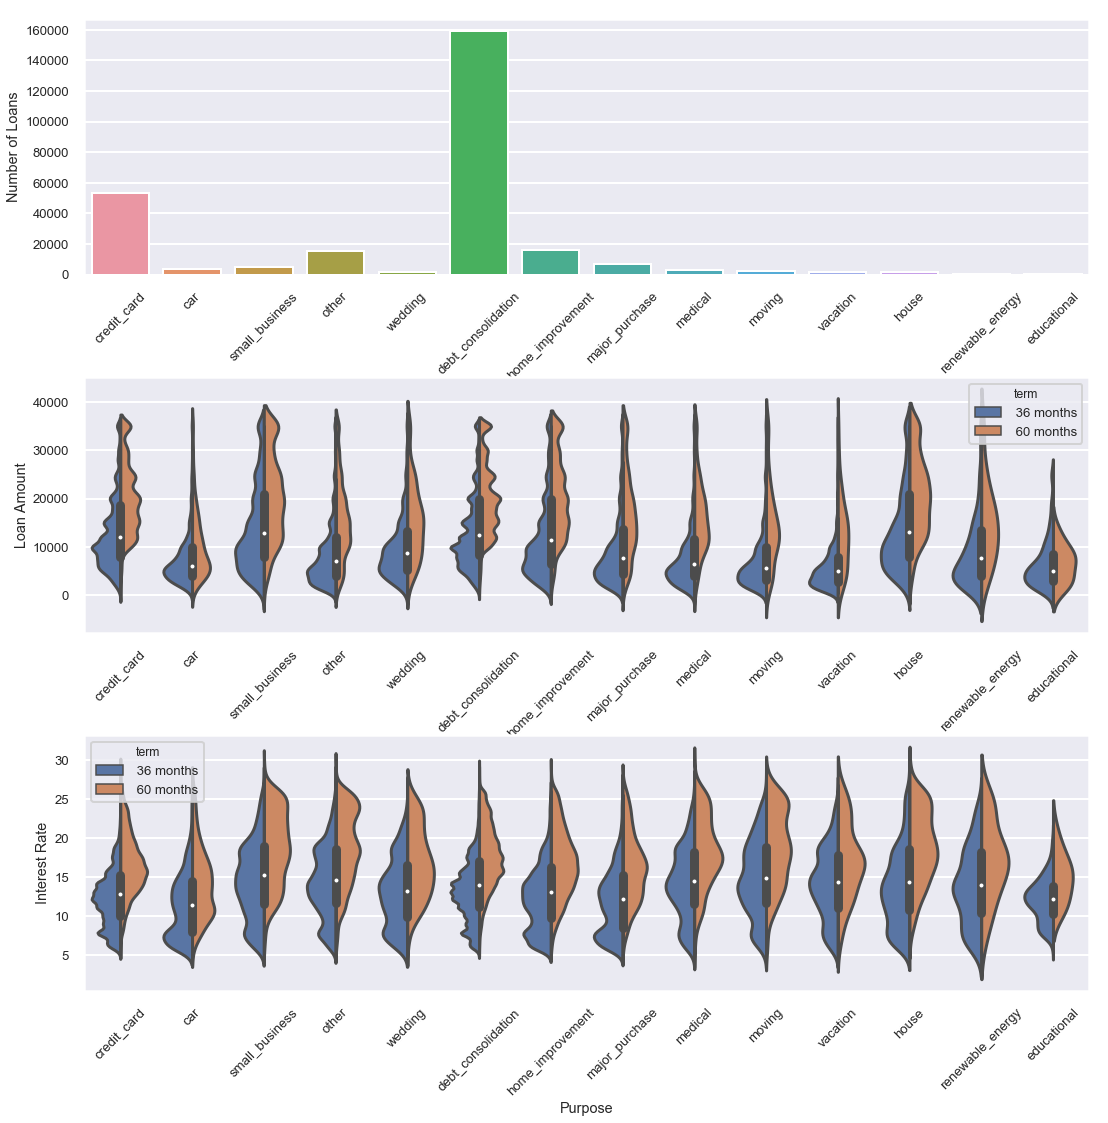

In [135]:
fig, ax=plt.subplots(3,1,figsize=(18,20))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

s0 = sns.countplot(x="purpose",data=df,ax=ax[0])
s0.set(xlabel='Purpose',ylabel='Number of Loans')
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)

s1 = sns.violinplot(x="purpose",y="loan_amnt",data=df, ax=ax[1], hue="term", split=True)
s1.set(xlabel='Purpose',ylabel='Loan Amount')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

s2 = sns.violinplot(x="purpose",y="int_rate",data=df, ax=ax[2], hue="term", split=True)
s2.set(xlabel='Purpose',ylabel='Interest Rate')
s2.set_xticklabels(s2.get_xticklabels(),rotation=45)

plt.show()

fig.savefig("LoanByPurpose.pdf")

## Data Transformation

### One-Hot encoding for catagorical data

In [136]:
for col in data_categorical.columns:
    dummies = pd.get_dummies(data_categorical[col])
    data_categorical = pd.concat([data_categorical, dummies], axis=1)
    data_categorical.drop(col, axis=1, inplace=True)

In [137]:
data_categorical.head()

,36 months,60 months,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [138]:
data_categorical.shape 

(270887, 111)

In [139]:
data_numerical.shape 

(270887, 14)

In [140]:
 data_categorical.reset_index(drop=True, inplace=True)

In [141]:
for col in data_categorical.columns:
    data_categorical[col].astype(int)

In [142]:
data_numerical.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_rec_prncp,collections_12_mths_ex_med,acc_now_delinq,emp_length
0,5000.0,10.65,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,5000.00,0.0,0.0,10
1,2500.0,15.27,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,456.46,0.0,0.0,1
2,2400.0,15.96,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,2400.00,0.0,0.0,10
3,10000.0,13.49,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,10000.00,0.0,0.0,10
5,5000.0,7.90,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,5000.00,0.0,0.0,3


### Scaling numerical data

In [143]:
scaler = StandardScaler()
scaled_num = pd.DataFrame(scaler.fit_transform(data_numerical),columns=data_numerical.columns)

In [144]:
scaled_num.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_rec_prncp,collections_12_mths_ex_med,acc_now_delinq,emp_length
0,-1.056826,-0.734526,-0.829508,1.393108,-0.340262,0.098941,-1.618381,-0.331102,-0.084089,1.178435,-0.724067,-0.078667,-0.053667,1.118531
1,-1.363031,0.312237,-0.726675,-1.997017,-0.340262,3.563054,-1.618381,-0.331102,-0.689615,-1.822734,-1.269448,-0.078667,-0.053667,-1.439225
2,-1.375280,0.468572,-1.030854,-1.014962,-0.340262,0.964969,-1.821288,-0.331102,-0.625372,1.776246,-1.036157,-0.078667,-0.053667,1.118531
3,-0.444415,-0.091061,-0.397611,0.419958,-0.340262,0.098941,-0.198035,-0.331102,-0.491620,-1.354180,-0.123895,-0.078667,-0.053667,1.118531
4,-1.056826,-1.357599,-0.623843,-0.699483,-0.340262,1.830998,-0.400941,-0.331102,-0.371892,-1.059314,-0.724067,-0.078667,-0.053667,-0.870835


In [145]:
#Converting loan_status to binary data for the model
df.loan_status[(df['loan_status']  == 'Fully Paid')]=0
df.loan_status[(df['loan_status']  == 'Default')]=1

### Combining numercial and categorical for the predictive Model

In [146]:
X = pd.concat([scaled_num, data_categorical],  axis=1)
y = df.loan_status

In [147]:
print(X.shape, y.shape)
X.head()

(270887, 125) (270887,)


,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_rec_prncp,collections_12_mths_ex_med,acc_now_delinq,emp_length,36 months,60 months,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,-1.056826,-0.734526,-0.829508,1.393108,-0.340262,0.098941,-1.618381,-0.331102,-0.084089,1.178435,-0.724067,-0.078667,-0.053667,1.118531,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.363031,0.312237,-0.726675,-1.997017,-0.340262,3.563054,-1.618381,-0.331102,-0.689615,-1.822734,-1.269448,-0.078667,-0.053667,-1.439225,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.375280,0.468572,-1.030854,-1.014962,-0.340262,0.964969,-1.821288,-0.331102,-0.625372,1.776246,-1.036157,-0.078667,-0.053667,1.118531,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.444415,-0.091061,-0.397611,0.419958,-0.340262,0.098941,-0.198035,-0.331102,-0.491620,-1.354180,-0.123895,-0.078667,-0.053667,1.118531,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-1.056826,-1.357599,-0.623843,-0.699483,-0.340262,1.830998,-0.400941,-0.331102,-0.371892,-1.059314,-0.724067,-0.078667,-0.053667,-0.870835,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Model

#### Split the data into training and test

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
y_test=list(y_test)

In [149]:
X_train.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_rec_prncp,collections_12_mths_ex_med,acc_now_delinq,emp_length,36 months,60 months,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
31730,-0.628138,0.006365,-0.555288,-0.082519,-0.340262,0.098941,-0.198035,-0.331102,-0.116236,0.467526,-0.810655,-0.078667,-0.053667,-0.302445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
141323,-0.444415,0.321300,-0.109679,-0.588811,-0.340262,-0.767087,-0.400941,1.918436,-0.521691,0.604860,-0.123895,-0.078667,-0.053667,-1.439225,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
223817,-0.787365,1.494944,-0.589565,-0.244074,-0.340262,-0.767087,-1.415474,-0.331102,-0.659746,1.340006,-0.459991,-0.078667,-0.053667,0.550141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
198776,0.535442,0.389272,0.524455,-0.310223,-0.340262,-0.767087,0.004872,1.918436,0.122664,0.479643,0.836380,-0.078667,-0.053667,-0.018250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
80472,-1.375280,0.321300,0.301651,-1.219769,-0.340262,0.964969,-0.806755,-0.331102,-0.636863,-1.269356,-1.036157,-0.078667,-0.053667,-0.870835,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Synthetic Minority Over-sampling Technique (SMOT) for Class Imbalance 
We  use SMOTE model to balance the imbalanced data, to solve the imbalance problem shown below:

In [150]:
df['loan_status'].value_counts(normalize=True, dropna=False)

0    0.774164
1    0.225836
Name: loan_status, dtype: float64

In [151]:
#Converting loan_status to binary data for the model
df.loan_status[(df['loan_status']  == 0)]='Fully Paid'
df.loan_status[(df['loan_status']  == 1)]='Default'

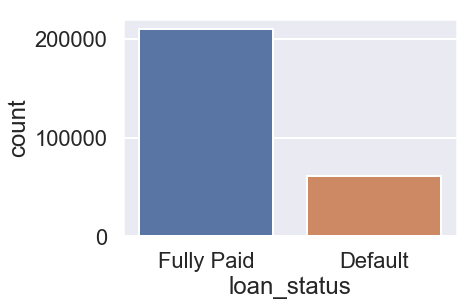

In [152]:
sns.set_context("poster")
sns.countplot(x='loan_status', data=df)

- About 77% (~210k) of the loans are fully paid and 21% (61k) are Default. This shows that the data is Unbalanced. We will need to handle the unbalance data using SMOTE.

In [153]:
print(y_train.value_counts())# Original class distribution
y_train_for_smote=[i for i in y_train]
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train_for_smote) 
print(pd.Series(y_train_resampled).value_counts()) # Synthetic sample class distribution
y_train_resampled=list(y_train_resampled)
y_train=list(y_train)

0    167844
1     48865
Name: loan_status, dtype: int64
1    167844
0    167844
dtype: int64


In [ ]:
plt.bar([0,1], [Counter(y_rus)[0], Counter(y_rus)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_rus)[0]), (0.25, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_rus)[1]), (0.75, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

## Naïve Bayes

In [154]:
# Create a function to plot confusion matrix
def plot_confusionMatrix(cnf_matrix):    
    import seaborn as sns
    import matplotlib.pyplot as plt     
    ax= plt.subplot()
    sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Greens, ax = ax, fmt='g'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [155]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
predicted_probas=clf.predict_proba(X_test)

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) 

0.5448706116874008

In [157]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test, y_pred)
cnf_matrix

array([[19202, 22665],
       [ 1993, 10318]], dtype=int64)

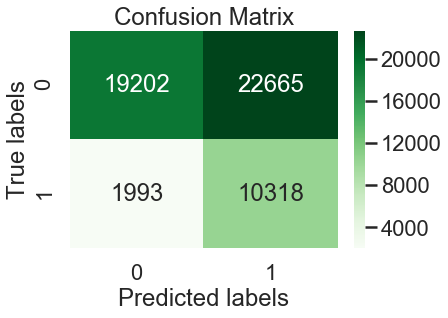

In [158]:
plot_confusionMatrix(cnf_matrix)

In [159]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel() 
TN, FP, FN, TP

(19202, 22665, 1993, 10318)

In [160]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.46      0.61     41867
           1       0.31      0.84      0.46     12311

   micro avg       0.54      0.54      0.54     54178
   macro avg       0.61      0.65      0.53     54178
weighted avg       0.77      0.54      0.57     54178



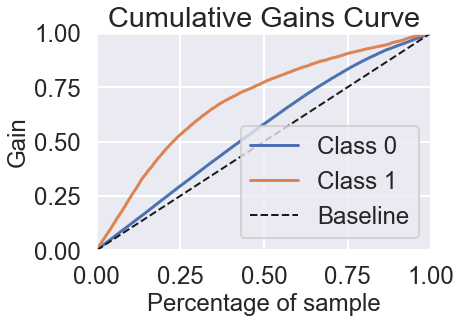

In [161]:
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

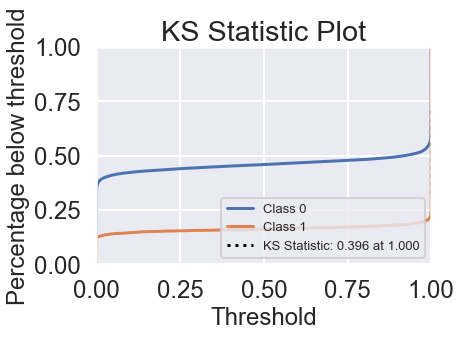

In [162]:
skplt.metrics.plot_ks_statistic(y_test, predicted_probas)
plt.legend(loc=4, prop={'size': 13})
plt.show()

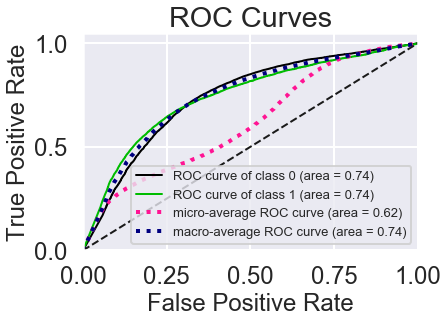

In [163]:
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.legend(loc=4, prop={'size': 13})
plt.show()


The Area Under the ROC Curve (AUC) is 74% for identifying the loan to be default.

Despite its simplicity, the Naive Bayesian classifier often does surprisingly well and is widely used because it often outperforms more sophisticated classification methods. In our data, it shows good accuracy, however we would still want to see better accuracy by exploring different classification algorithms

## LogisticRegression

In [164]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 0.0001)
logreg.fit(X_train_resampled, y_train_resampled)    
y_pred2 = logreg.predict(X_test)
predicted_prob2 = logreg.predict_proba(X_test)

In [165]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.9460482114511425

In [166]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test, y_pred2)
cnf_matrix

array([[39885,  1982],
       [  941, 11370]], dtype=int64)

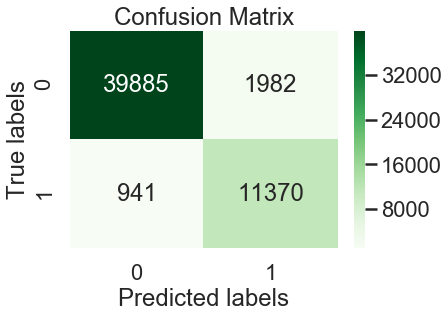

In [167]:
plot_confusionMatrix(cnf_matrix)

In [169]:
report = classification_report(y_test, y_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     41867
           1       0.85      0.92      0.89     12311

   micro avg       0.95      0.95      0.95     54178
   macro avg       0.91      0.94      0.93     54178
weighted avg       0.95      0.95      0.95     54178



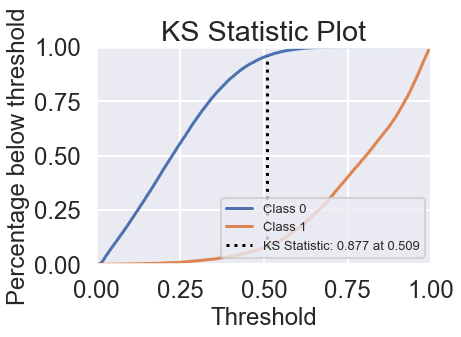

In [171]:
skplt.metrics.plot_ks_statistic(y_test, predicted_prob2)
plt.legend(loc=4, prop={'size': 13})
plt.show()

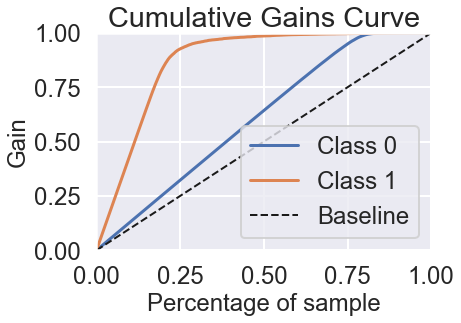

In [172]:
skplt.metrics.plot_cumulative_gain(y_test, predicted_prob2)
plt.show()

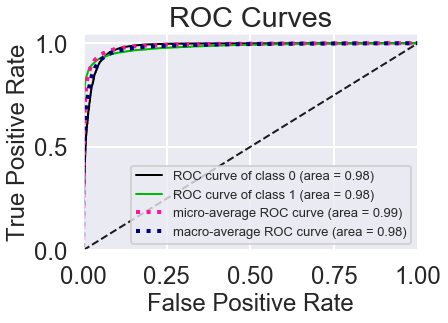

In [173]:
skplt.metrics.plot_roc(y_test, predicted_prob2)
plt.legend(loc=4, prop={'size': 13})
plt.show()


The Area Under the ROC Curve (AUC) is 98 % for identifying the loan to be default. This shows that much improvement from our previous Naive Bayes model.

## Random Forest

In [174]:
model=RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)
y_pred3=model.predict(X_test)
predicted_prob3=model.predict_proba(X_test)

In [175]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.9705046328768134

In [176]:
cnf_matrix = confusion_matrix(y_test, y_pred3)

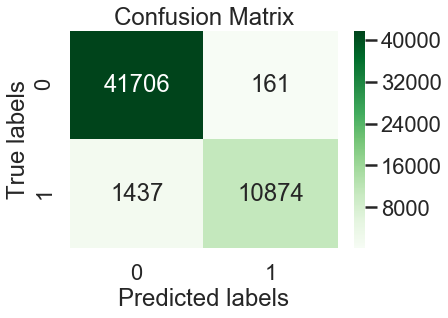

In [177]:
#Plot ConfusionMatrix for Random Rorest
plot_confusionMatrix(cnf_matrix)

In [179]:
report = classification_report(y_test, y_pred3)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     41867
           1       0.99      0.88      0.93     12311

   micro avg       0.97      0.97      0.97     54178
   macro avg       0.98      0.94      0.96     54178
weighted avg       0.97      0.97      0.97     54178



*Sensitivity, Recall, or True Positive Rate (TPR) = TP/(TP+FN) is 90%*


*The recall percentage, 90.0 % of the positives are appropriately identified*

*Negative Predictive Value (NPV) = TN/(TN+FN) is 96.1%*

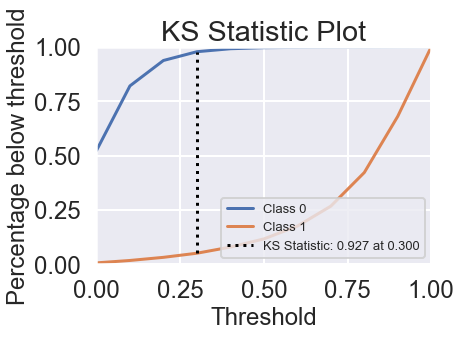

In [181]:
skplt.metrics.plot_ks_statistic(y_test, predicted_prob3)
plt.legend(loc=4, prop={'size': 13})
plt.show()

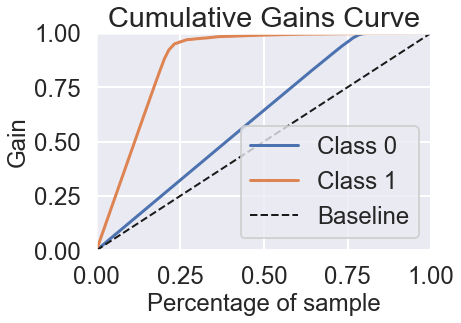

In [182]:
skplt.metrics.plot_cumulative_gain(y_test, predicted_prob3)
plt.show()

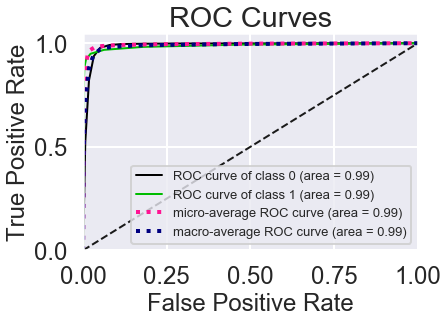

In [183]:
skplt.metrics.plot_roc(y_test, predicted_prob3)
plt.legend(loc=4, prop={'size': 13})
plt.show()


The Area Under the ROC Curve (AUC) is 99 % for identifying the loan to be default. This shows that much improvement from our previous Naive Bayes model.

References:
https://github.com/ganevniko/LendingClub-Credit-Risk-Analysis/blob/master/LendingClub.ipynb
https://github.com/georgetown-analytics/lending-club/blob/master/iclub-DefaultPrediction9.ipynb
